In [1]:
from state_env import State
import pandas as pd
import numpy as np
import configparser
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
def plot_fidelity_vs_noise(noise_effects, title = None):

    # Ensure 'max_fidelity' is float for aggregation
    noise_effects['max_fidelity'] = noise_effects['max_fidelity'].astype(float)

    stats = noise_effects.groupby(
        ['noise_amplitude', 'noise_probability']
    ).agg(
        mean_fidelity=('max_fidelity', 'mean'),
    ).reset_index()

    # Ensure 'mean_fidelity' is float for plotting
    stats['mean_fidelity'] = stats['mean_fidelity'].astype(float)

    pivot_data = stats.pivot(    
        index='noise_amplitude',
        columns='noise_probability',
        values='mean_fidelity'
    )

    X, Y = np.meshgrid(pivot_data.columns.values, pivot_data.index.values)
    Z = pivot_data.values

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, levels=25, cmap='coolwarm')

    plt.colorbar(contour, label='Mean Fidelity')
    plt.xlabel('Noise Probability')
    plt.ylabel('Noise Amplitude')

    if title:
        plt.title(title)
    else:
        plt.title('Mean Fidelity vs Noise Probability and Amplitude')
        
    plt.title('Mean Fidelity Contour Plot')
    plt.show()

# Assesment of noise model

Testing the noise model by comparing natural evolution of an state with and without noise. We repeat this for chains of length 8,12 and 16.

## N = 8

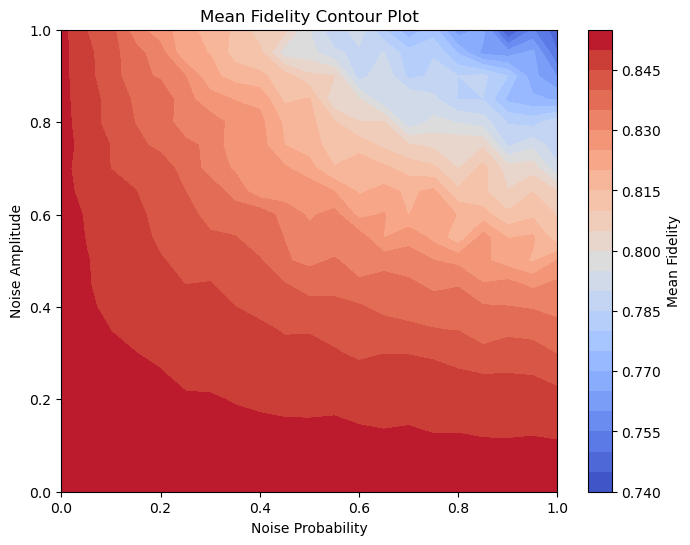

In [ ]:
noise_effects = pd.read_csv('n8_noise_effects.csv', delimiter=',')
plot_fidelity_vs_noise(noise_effects, title = "N=8")

## N = 12

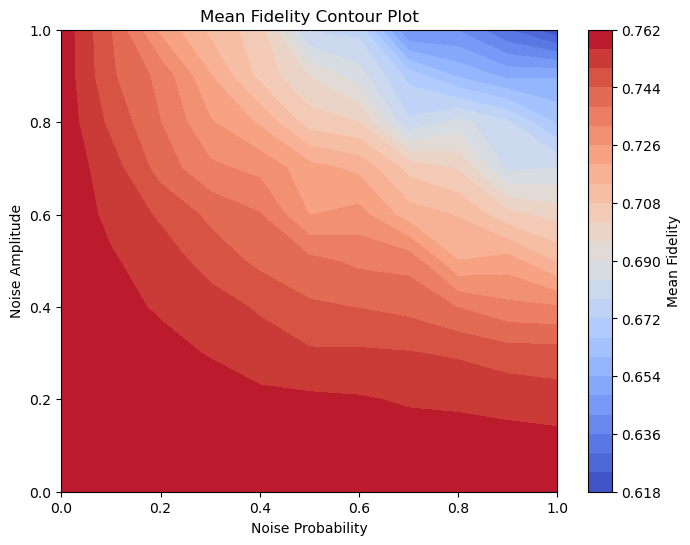

In [5]:
noise_effects = pd.read_csv('n12_noise_effects.csv', delimiter=',')

plot_fidelity_vs_noise(noise_effects, title = "N=12")

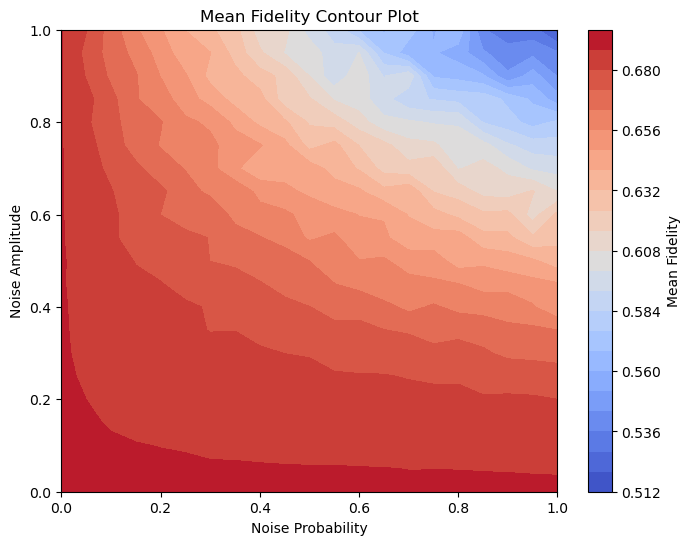

In [6]:
noise_effects = pd.read_csv('n16_noise_effects.csv', delimiter=',')

plot_fidelity_vs_noise(noise_effects, title = "N=16")

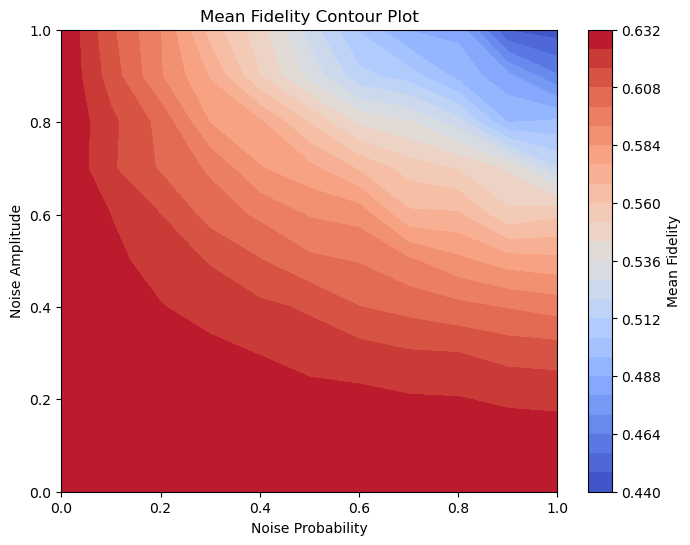

In [7]:
noise_effects = pd.read_csv('n20_noise_effects.csv', delimiter=',')

plot_fidelity_vs_noise(noise_effects, title = "N=20")

Text(0.5, 1.0, 'Inner Product vs Time Step (amplitude=1, probability=1)')

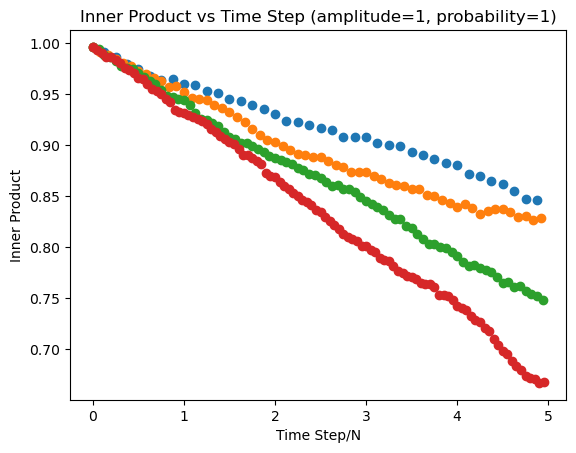

In [16]:
noise_details = pd.read_csv('n8_noise_details.csv', delimiter=',')

fixed_amplitude = 1
fixed_probability = 1

def plot_noise_details(noise_detailes, fixed_amplitude, fixed_probability, n):

    fixed_noise = noise_details[
        (noise_details['noise_amplitude'] == fixed_amplitude) &
        (noise_details['noise_probability'] == fixed_probability)
    ]

    # Average over episodes for each time_step
    fixed_noise = fixed_noise.groupby('time_step').agg({
        'fid_value': 'mean',
        'inner_product': 'mean'
    }).reset_index()

    # Convert time_step to int if necessary
    plt.scatter(fixed_noise['time_step']/n, fixed_noise['inner_product'], label = f'n={n}')

for n in [8, 12, 16, 20]:
    noise_details = pd.read_csv(f'n{n}_noise_details.csv', delimiter=',')
    plot_noise_details(noise_details, fixed_amplitude, fixed_probability,n)

plt.xlabel('Time Step/N')
plt.ylabel('Inner Product')
plt.title(f'Inner Product vs Time Step (amplitude={fixed_amplitude}, probability={fixed_probability})')


Text(0.5, 1.0, 'Mean Fidelity Value vs Time Step for Selected Noise Parameters')

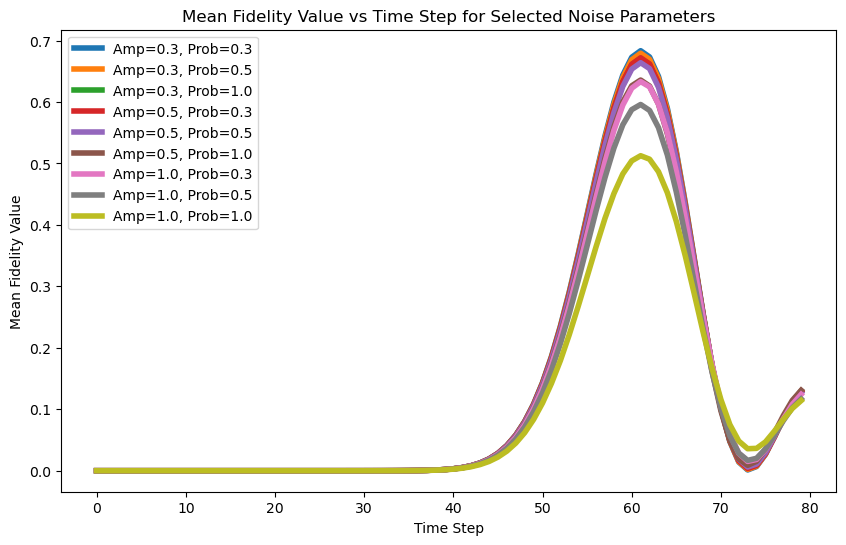

In [27]:
noise_details = pd.read_csv('n16_noise_details.csv', delimiter=',')

grouped = noise_details.groupby(['noise_amplitude', 'noise_probability', 'time_step'])['fid_value'].mean().reset_index()

# Only plot for noise_amplitude and noise_probability in {0, 0.5, 1}
selected = grouped[
    grouped['noise_amplitude'].isin([0.3, 0.5, 1]) &
    grouped['noise_probability'].isin([0.3, 0.5, 1])
]

plt.figure(figsize=(10, 6))
for (ampl, prob), group in selected.groupby(['noise_amplitude', 'noise_probability']):
    plt.plot(group['time_step'], group['fid_value'], label=f'Amp={ampl}, Prob={prob}', lw =4)
plt.legend()

plt.xlabel('Time Step')
plt.ylabel('Mean Fidelity Value')
plt.title('Mean Fidelity Value vs Time Step for Selected Noise Parameters')


In [ ]:
# code to generate the data
# Uncomment the following code to generate the data if needed

# noisy_env = State()  # noisy environment
# ideal_env = State()  # ideal environment

# number_of_episodes = 5

# n8_noise_effects = pd.DataFrame(columns=['episode','noise_amplitude', 'noise_probability', 'max_fidelity'])    # we store the mean fidelity for each noise amplitude and probability
# n8_noise_details = pd.DataFrame(columns=['episode','time_step','noise_amplitude', 'noise_probability', 'fid_value','inner_product'])

# config = configparser.ConfigParser()
# config.read("config.ini")  # read the configuration file

# for noise_amplitude in np.linspace(0, 1, 10):
#     for noise_probability in np.linspace(0, 1, 10):

#         print(f"Testing with noise_amplitude: {noise_amplitude}, noise_probability: {noise_probability}")
#         lth = config.getint("system_parameters", "max_t_steps")

#         actionspace = []  # store successful actions
#         Qvalue = []  # total reward
#         fid_max_vector = []  # max. fidelity in each episode
#         t_fid_max_vector = []  # time of max. fidelity
#         fid_end_vector = []  # final fidelity
#         t_end_vector = []  # time of final fidelity
#         success_action_sequences = []  # store successful success_action_seq

#         for episode in range(number_of_episodes):
#             # Generate a complex normalized vector of 16 components
#             noisy_observation = noisy_env.reset()
#             ideal_observation = ideal_env.reset()
            
#             evolution = []
#             Q = 0
#             fid_max = 0
#             t_fid_max = 0

#             for i in range(lth):  # episode maximum length
#                 # Use the loaded model to predict the action
#                 # Correct the shape of the noisy_observation before feeding it to the model

#                 noisy_observation_, reward, done, fidelity = noisy_env.noisy_step(0,noise_amplitude=noise_amplitude,noise_probability=noise_probability)  # take action in the noisy_environment
#                 ideal_observation_, reward_ideal, done_ideal, fidelity_ideal = ideal_env.step(0)  # take action in the ideal_environment

#                 Q += reward  # total reward
                
#                 evolution.append(fidelity)  # store fidelity values
#                 noisy_observation = noisy_observation_  # Update current state
#                 ideal_observation = ideal_observation_  # Update current state

#                 inner_product = np.vdot(noisy_observation, ideal_observation)


#                 n8_noise_details = pd.concat(
#                     [
#                         n8_noise_details,
#                         pd.DataFrame(
#                             {
#                                 "episode": [episode],
#                                 "time_step": [i],
#                                 "noise_amplitude": [noise_amplitude],
#                                 "noise_probability": [noise_probability],
#                                 "fid_value": [fidelity],
#                                 "inner_product": [inner_product],
#                             }
#                         ),
#                     ],
#                     ignore_index=True,
#                 )
#             n8_noise_effects = pd.concat(
#                 [
#                     n8_noise_effects,
#                     pd.DataFrame(
#                         {
#                             "episode": [episode],
#                             "noise_amplitude": [noise_amplitude],
#                             "noise_probability": [noise_probability],
#                             "max_fidelity": [max(evolution)],
#                         }
#                     ),
#                 ],
#                 ignore_index=True,
#             )

Testing with noise_amplitude: 0.0, noise_probability: 0.0


/tmp/ipykernel_42539/1067542919.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  n8_noise_details = pd.concat(
/tmp/ipykernel_42539/1067542919.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  n8_noise_effects = pd.concat(


Testing with noise_amplitude: 0.0, noise_probability: 0.1111111111111111
Testing with noise_amplitude: 0.0, noise_probability: 0.2222222222222222
Testing with noise_amplitude: 0.0, noise_probability: 0.3333333333333333
Testing with noise_amplitude: 0.0, noise_probability: 0.4444444444444444
Testing with noise_amplitude: 0.0, noise_probability: 0.5555555555555556
Testing with noise_amplitude: 0.0, noise_probability: 0.6666666666666666
Testing with noise_amplitude: 0.0, noise_probability: 0.7777777777777777
Testing with noise_amplitude: 0.0, noise_probability: 0.8888888888888888
Testing with noise_amplitude: 0.0, noise_probability: 1.0
Testing with noise_amplitude: 0.1111111111111111, noise_probability: 0.0
Testing with noise_amplitude: 0.1111111111111111, noise_probability: 0.1111111111111111
Testing with noise_amplitude: 0.1111111111111111, noise_probability: 0.2222222222222222
Testing with noise_amplitude: 0.1111111111111111, noise_probability: 0.3333333333333333
Testing with noise_am